# Hyperparameter Tuning for Neural Networks

Fine-tuning the parameters of neural networks is pivotal for their efficient training. These parameters, known as hyperparameters, are predetermined settings that shape the network's architecture and training process. They encompass variables like learning rate, batch size, layer count, neuron quantity per layer and regularization parameters.
The process of hyperparameter tuning revolves around systematically exploring various hyperparameter combinations to maximize the network's performance on a given task or dataset. It's an iterative and resource-intensive procedure, involving training multiple neural networks with diverse hyperparameter configurations and evaluating their efficacy.

Several strategies are commonly employed for hyperparameter tuning:

**Grid Search:** This method entails defining a grid of hyperparameter values and training a model for each grid point. While exhaustive, it can be computationally taxing, particularly for extensive hyperparameter spaces.  
**Random Search:** Unlike grid search, random search randomly samples hyperparameter values from predefined distributions. Although less computationally demanding than grid search, it can still yield effective hyperparameter configurations.  
**Hyperband:** Hyperband is particularly notable for its efficiency in resource allocation. It is based on the concept of successive halving, where a set of configurations is trained for a few epochs and then only the top-performing configurations are retained and given more resources for further training.  
**Bayesian Optimization:** Bayesian optimization leverages the objective function (validation loss) to intelligently select hyperparameter sets for evaluation based on previous assessments. It is especially efficient for high-dimensional hyperparameter spaces.  
**Optuna:** Optuna is an automatic hyperparameter optimization framework designed for efficiency and flexibility. It uses a combination of techniques such as pruning and Bayesian optimization to minimize (or maximize) an objective function while searching for the optimal hyperparameter configuration. Optuna dynamically narrows down the search space by early stopping poorly performing models, which improves its overall efficiency, especially when dealing with large search spaces. This allows it to find good hyperparameters faster than some other optimization techniques.  
**Gradient-Based Optimization:** Certain hyperparameters, such as the learning rate, can be optimized using gradient-based techniques. Methods like stochastic gradient descent with learning rate schedules or adaptive techniques like Adam can dynamically adjust hyperparameters during training.  
**Cross-Validation:** Cross-validation serves not only to assess model generalization but also to refine hyperparameters. By partitioning data into subsets, training on different subsets and evaluating performance on the remainder, one can obtain a more reliable estimate of hyperparameter efficacy.  
  
In essence, hyperparameter tuning is indispensable for optimizing neural network performance. Achieving this optimization requires a delicate balance between computational resources, exploration of search spaces and consideration of specific dataset and problem characteristics.

### Project Overview: Churn Dataset Optimization

In this project, we aim to optimize a neural network for the churn dataset. The following steps outline the process in detail:

**Feature Engineering:**  
We begin by preparing the dataset for model training:  
Log Transformation: Applying logarithmic transformation to skewed numerical features to make their distribution closer to normal.  
One-Hot Encoding: Converting categorical variables into a binary format, creating new binary columns for each category.  
Outlier Removal: Detecting and removing extreme values to reduce their potential negative influence on model training.  
Scaling: Standardizing features to ensure all variables are on the same scale, improving model performance and convergence.  
  
**Hyperparameter Optimization:**  
The following hyperparameters are tuned using four different optimization techniques (Random Search, Hyperband, Bayesian Optimization and Optuna):  
Number of Hidden Layers: The number of hidden layers in the network.  
Number of Neurons in Hidden Layers: The number of neurons per hidden layer.  
Reduction Factor: A factor that progressively decreases the number of neurons as the network goes deeper.  
Kernel Regularizer Strength: L2 regularization to prevent overfitting.  
Dropout Rate: The dropout rate applied to each layer to prevent overfitting.  
Optimizer: The optimization algorithm to use (Adam, SGD, RMSprop).  
Learning Rate: The learning rate for the optimizer.  
Batch Size: The number of samples per batch during training.  
  
The optimization process for each technique follows a structured approach:  
Tuning: The algorithm searches the hyperparameter space for the best combination of values.  
Training: The model is trained using the best hyperparameters identified during tuning.    
Final Model: Using the best epoch as the stopping point to finalize the model.  
  
In classification tasks, it's often better to **evaluate models** based on validation loss (val_loss) rather than validation accuracy (val_accuracy) because val_loss provides a more nuanced measure of model performance. Val_loss gives a continuous measure of how well the model is minimizing the error across all classes, making it more sensitive to problems like misclassification or overconfidence, while val_accuracy might miss such subtleties.  
  
**Comparison of Optimizations:**  
After training the models with each of the four tuning approaches, we compare their performance using:  
ROC Curves: We plot the ROC (Receiver Operating Characteristic) curves for all four models and calculate the AUC (Area Under the Curve) to assess how well each model differentiates between classes.  
Confusion Matrix: We generate confusion matrices for each model to compare their classification performance and visualize the true positives, false positives, true negatives and false negatives.  
  
By the end of the project, we will determine the most effective hyperparameter tuning strategy for the churn dataset and identify the optimal configuration for our neural network model. This allows us to balance model complexity, computational resources and overall performance.  
  
Some notes on **accuracy in classification tasks**:  
In classification problems accuracy alone can be misleading. Accuracy measures the overall correctness of the model. It is the ratio of the number of correct predictions (both true positives and true negatives) to the total number of predictions and provides a general sense of how often the model is correct. 
That's why it’s crucial to focus on metrics like precision, recall and F1-score instead:

**Precision:**  
This metric measures the proportion of true positive predictions among all positive predictions made by the model. High precision indicates that when the model predicts a positive class, it is likely correct. This is particularly important in scenarios where false positives are costly or undesirable.  
**Recall (Sensitivity):**  
Recall measures the proportion of true positive predictions among all actual positives. It indicates how well the model identifies positive instances. In cases where missing a positive instance is critical (failing to diagnose a disease), high recall is essential.  
**F1-Score:**  
The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics, making it particularly useful when you need to take both false positives and false negatives into account. It’s a good overall measure of a model's performance, especially in imbalanced datasets where one class may significantly outnumber the other.  
  
While overall accuracy gives a quick sense of performance, it can be deceptive in imbalanced datasets where one class is predominant. Focusing on precision, recall and F1-score allows for a more nuanced understanding of a model's strengths and weaknesses, guiding better decision-making and more effective model improvements.

## Load and explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

### Custom Functions
  
The functions defined below will be used later.

In [2]:
# Function for an initial inspection of the data
def get_data_info(dataframe):
    '''
    function to get most important info about DataFrame
    '''
    print("\nBASIC INFO\n")
    print(dataframe.info())
    print("=" * 100)
    print("DATAFRAME SHAPE\n", dataframe.shape)
    print("=" * 100)
    print("NUMBER OF DUPLICATE ROWS\n", dataframe.duplicated().sum())
    print("=" * 100)
    print("NULL VALUES")
    print(dataframe.isnull().sum())
    print("=" * 100)


# matplotlib settings
mpl.rc("lines", linewidth = 2.)
mpl.rc("axes", facecolor = ".9", edgecolor = "k")
mpl.rc("xtick", color = "k")
mpl.rc("ytick", color = "k")
mpl.rc("text", color = "k")
mpl.rc("figure", facecolor = "w", edgecolor = "k")

# Function for histogram plots
def plot_hist(df, cols):
    fig, axs = plt.subplots(len(cols), 1, figsize=(8, 6*len(cols)))
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], ax=axs[i], color='royalblue', edgecolor='black')
        axs[i].set_title(col)
        axs[i].grid(False)
        axs[i].set_axisbelow(True)
        axs[i].xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        axs[i].yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

After loading the dataset, we'll take a look at some basic information.

In [3]:
df_start = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')
df_start.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Each row in the dataset represents a bank customer and the columns contain various features that describe the customer's demographics, banking activity and behavior.
  
**RowNumber:** The row number in the dataset, acting as an index.  
**CustomerId:** A unique identifier for each customer.  
**Surname:** The surname (last name) of the customer, which may not provide useful predictive value on its own.  
**CreditScore:** The customer's credit score, indicating their creditworthiness.  
**Geography:** The country in which the customer resides (France, Spain).  
**Gender:** The gender of the customer (Male/Female).  
**Age:** The customer's age.  
**Tenure:** The number of years the customer has been with the bank.  
**Balance:** The customer's bank account balance.  
**NumOfProducts:** The number of bank products the customer uses.  
**HasCrCard:** Indicates whether the customer holds a credit card (1 = Yes, 0 = No).  
**IsActiveMember:** Whether the customer is an active member of the bank (1 = Yes, 0 = No).  
**EstimatedSalary:** The estimated salary of the customer.  
**Exited:** This is the target variable, where 1 means the customer churned (left the bank) and 0 means they did not churn.

In [4]:
get_data_info(df_start)


BASIC INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
DATAFRAME SHAPE
 (10000, 14)
NUMBER OF DUPLICATE ROWS
 0
NULL VALUES
RowNumb

The dataset does not contain any missing values. However, the columns 'RowNumber', 'CustomerId' and 'Surname' do not add any value to further analysis. We will remove these columns from the dataframe:

In [5]:
df_start.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

The describe() function provides a summary of the main statistical properties of the numerical columns in the dataset. Let's have a look:

In [6]:
df_start.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


CreditScore:  
The credit score varies widely, with a minimum of 350 and a maximum of 850. Most customers have a score centered around the mean, suggesting a fairly typical distribution for credit scores.  
Age:  
The average age of the customers is about 39, with a wide range from 18 to 92 years old. This shows that the bank serves a broad demographic.  
Tenure:  
This represents the number of years the customer has been with the bank. The tenure varies from 0 to 10 years, with an average of 5 years. A tenure of 0 likely indicates newer customers or those with short-lived relationships with the bank.  
Balance:  
Customer account balances vary dramatically. While the average is about 76,486, a significant portion of customers have a balance of 0, as indicated by the 25th percentile being 0. The top 25% of customers have balances well over 127,644, showing a skewed distribution.  
NumOfProducts:  
Most customers have 1 or 2 bank products, but the maximum is 4. The average of 1.53 suggests that many customers are only using one product, and very few are using all 4 products.  
HasCrCard (Credit Card):  
About 70.5% of customers have a credit card, while around 29.5% do not.  
IsActiveMember:  
Roughly 51.5% of the customers are active members of the bank, while the remaining 48.5% are inactive.  
EstimatedSalary:  
The salary estimates cover a wide range, with an average salary of about 100k. The distribution appears fairly uniform, given that the median (50th percentile) is also around 100k.  
Exited (Churn):  
About 20.37% of the customers have churned (exited the bank), while the remaining 79.63% have stayed. This indicates that the dataset is imbalanced, with fewer customers churning than staying. This imbalance is something to consider when building a predictive model, as it may bias predictions toward the majority class (non-churn).

In the following, we examine histograms of the columns "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary" and "Exited":

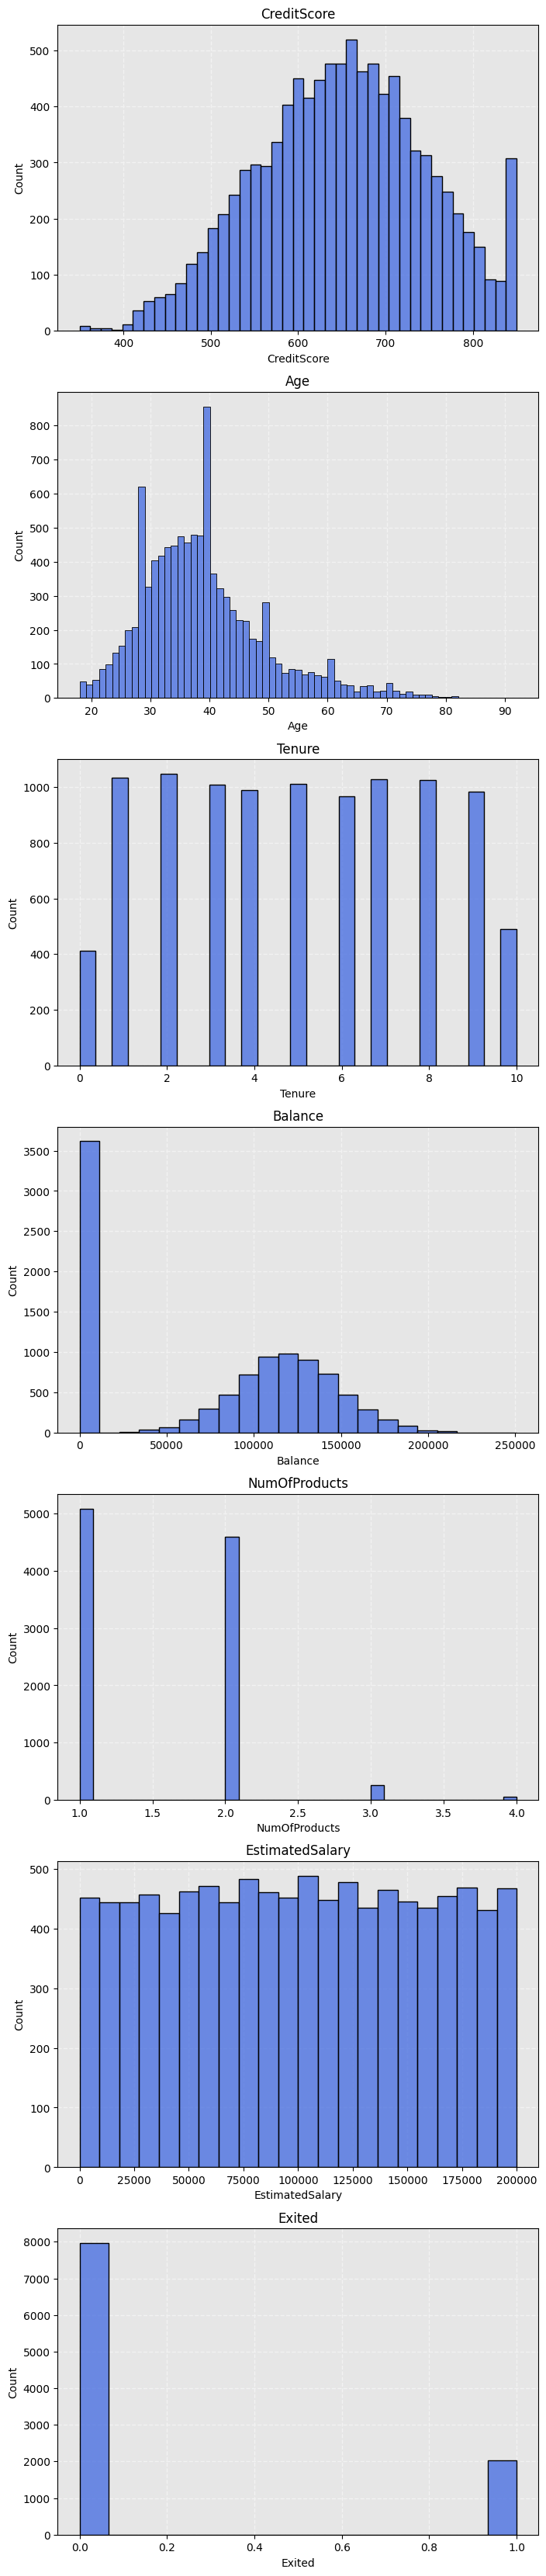

In [7]:
plot_hist(df_start, ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"])

Imbalanced Churn: Only about 20% of the customers have churned, meaning any churn prediction model will need to account for this imbalance.  
Zero Balances: A significant portion of customers have a balance of 0, which could indicate inactive accounts or customers in a specific product category.  
Wide Age and Credit Score Range: The customers represent a broad range of ages and credit scores, which could influence their likelihood of churn.  
Product Usage: Most customers only use 1 or 2 products and very few are using all 4. This could be an important factor in predicting churn.  
  
Notably, the distribution of data for the feature "Age" has a heavy tail to the right. We will address this in the subsequent chapter titled "Feature Engineering".

## Feature Engineering and Preprocessing Data

We begin by applying logarithmic transformation the feature "Age" and converting the categorical variables "Geography" and "Gender" into a binary format, creating new binary columns for each category.  
After detecting and removing extreme values (outliers) to reduce their potential negative influence on model training, we standardizing the features using the MinMaxScaler to ensure all variables are on the same scale, improving model performance and convergence.  

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For outlier removal
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
df = df_start.copy()

As mentioned earlier, the "Age" feature has a heavy tail to the right, which can negatively impact predictions. To shrink the heavy tail and to make the distribution more symmetrical we will replace the feature "Age" with its **logarithm**.

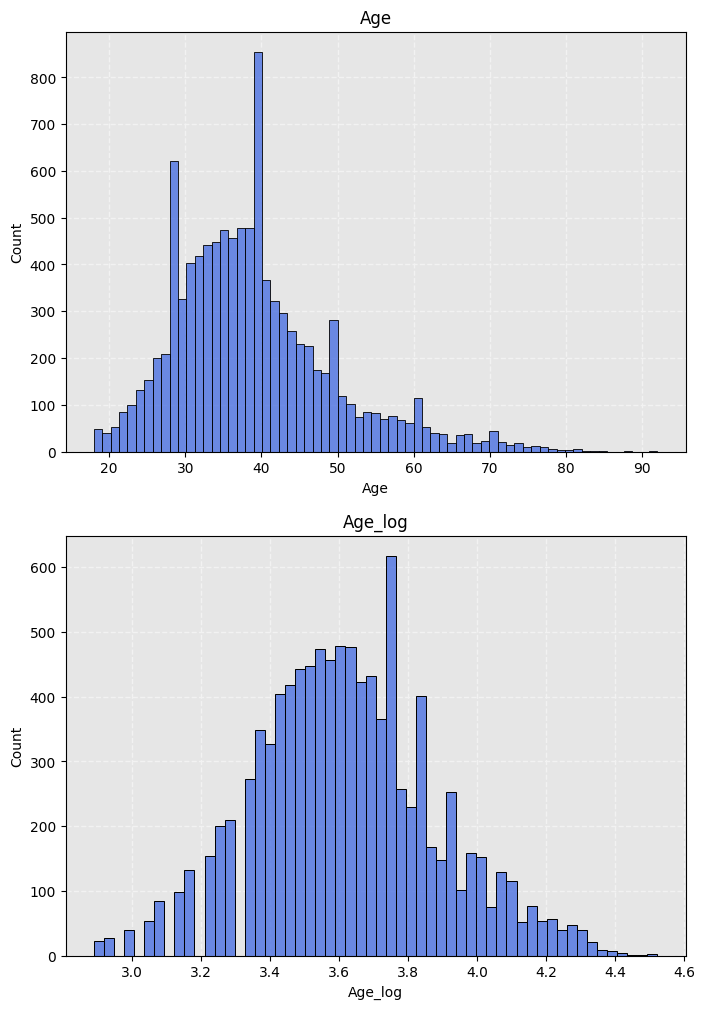

In [10]:
df['Age_log'] = np.log(df['Age'])

plot_hist(df, ["Age", "Age_log"])

In [11]:
df.drop(columns = ['Age'], axis = 1, inplace = True)

The two columns "Geography" and "Gender" do not contain numerical values. We will use a **OneHotEncoder** and take a another look at the transformed data.

In [12]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Encode the specified categorical features ('Geography' and 'Gender')
encoded_features = encoder.fit_transform(df[['Geography', 'Gender']])

# Create a DataFrame with the encoded features and their respective column names
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Geography', 'Gender']))

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=['Geography', 'Gender'], inplace=True)

# Take a final look at the transformed data
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2,0.00,1,1,1,101348.88,1,3.737670,1.0,0.0,0.0,1.0,0.0
1,608,1,83807.86,1,0,1,112542.58,0,3.713572,0.0,0.0,1.0,1.0,0.0
2,502,8,159660.80,3,1,0,113931.57,1,3.737670,1.0,0.0,0.0,1.0,0.0
3,699,1,0.00,2,0,0,93826.63,0,3.663562,1.0,0.0,0.0,1.0,0.0
4,850,2,125510.82,1,1,1,79084.10,0,3.761200,0.0,0.0,1.0,1.0,0.0


### Splitting the Data, Outlier Removal, Scaling and Resampling the Data

**Data splitting** is a crucial step in machine learning to ensure that the model generalizes well to unseen data. Typically, the dataset is divided into:  
Training Set: Used to train the neural networks.  
Validation Set: Used to tune model hyperparameters and prevent overfitting.  
Test Set: Used to evaluate the model’s performance on unseen data.  
Properly splitting the data ensures that the model’s performance is tested on data it has never seen, which provides an honest evaluation of its ability to generalize.  
  
**Outliers** are data points that differ significantly from other observations. In classification tasks, outliers can distort model training, leading to poor generalization or skewed predictions. Outlier removal involves identifying and eliminating these extreme values. This helps the model focus on the main patterns in the data, improving classification performance.  
  
**Scaling** refers to normalizing the range of the input features so that they are on a similar scale. Neural networks are sensitive to the magnitude of input values and large disparities can hinder model training. Two common scaling techniques are:  
Standardization: Centers the data around zero with a standard deviation of 1.  
Min-Max Scaling: Scales the data to a fixed range, usually [0, 1].  
Scaling is especially important for neural networks because large differences in feature magnitudes can slow down the convergence of gradient-based optimization algorithms and affect the network's ability to learn effectively.  
  
**Resampling** refers to modifying the distribution of classes in the dataset, typically used when dealing with imbalanced data (when some classes are underrepresented). Two common resampling techniques include:  
Oversampling: Increasing the number of examples in the minority class by replicating existing data points or generating new ones (using techniques like SMOTE).  
Undersampling: Reducing the number of examples in the majority class to balance it with the minority class.  
Resampling helps neural networks avoid bias toward the majority class and improve performance on underrepresented classes.  

In [13]:
X = df.copy()
y = df[["Exited"]]

print("Shape of df:", df.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

Shape of df: (10000, 14)
Shape of X: (10000, 14)
Shape of y: (10000, 1)


**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is an unsupervised machine learning algorithm commonly used for clustering data. It operates by grouping together points that are closely packed together, marking these regions as clusters, while points that lie alone in low-density regions are considered noise or outliers.  
This method relies on two parameters: epsilon (ε), which defines the maximum distance between two points to be considered neighbors and the minimum number of points required to form a dense region. A point is classified as a core point if it has at least the minimum number of points within its epsilon radius; otherwise, it is classified as a border point or noise.  
It is important to note that outliers should only be removed in the training dataset, but not in the validation or test datasets. Removing them from validation or test data would lead to data leakage, since it introduces prior knowledge about the data distribution into the evaluation process. This can harm the model’s ability to generalize.

Number of clusters: 1
Distribution of clusters:
cluster
 0    6322
-1      78
Name: count, dtype: int64


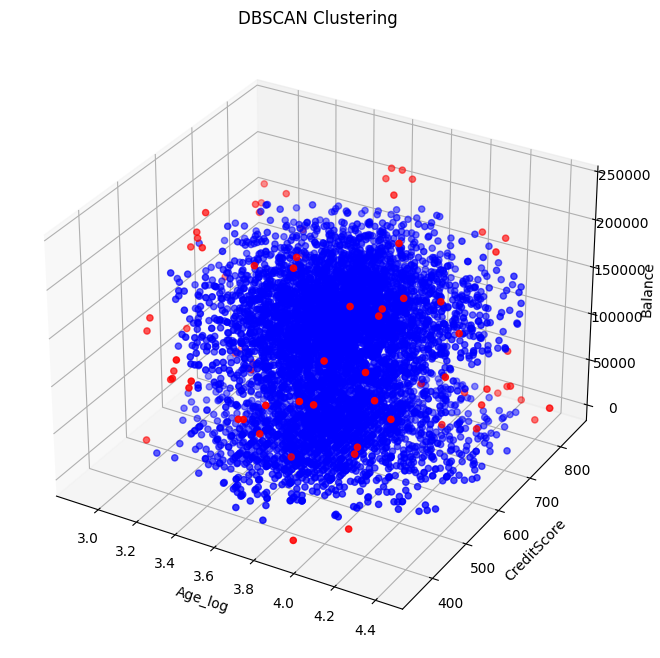

In [14]:
# Make a copy of the DataFrame
X_train_copy = X_train.copy()

# Select the features
X_train_outl = X_train[['Age_log', 'CreditScore', 'Balance']] 

# Standardize the data
scaler = StandardScaler()
X_train_outl_scaled = scaler.fit_transform(X_train_outl)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.45, min_samples=8)
dbscan.fit(X_train_outl_scaled)

# Add cluster labels to the DataFrame
X_train_copy['cluster'] = dbscan.labels_

# Display the number of clusters and their distribution
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of clusters:", num_clusters)
print("Distribution of clusters:")
print(X_train_copy['cluster'].value_counts())

# Save the indices of outliers in index_0
index_0 = X_train_copy[X_train_copy['cluster'] == -1].index.tolist()

# Create a color list for the clusters
colors = ['blue' if label != -1 else 'red' for label in X_train_copy['cluster']]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Scatter plot of the first three features with cluster colors
ax.scatter(X_train_copy['Age_log'], X_train_copy['CreditScore'], X_train_copy['Balance'], c=colors)
ax.set_xlabel('Age_log')
ax.set_ylabel('CreditScore')
ax.set_zlabel('Balance')
ax.set_title('DBSCAN Clustering')

plt.show()

DBSCAN has identified 78 data points as outliers (shown here in red). We will remove the data points identified as outliers:

In [15]:
# Remove outliers based on DBSCAN cluster labels
X_train_out = X_train_copy.drop(index_0)

# Drop the 'cluster' column from the cleaned DataFrame
X_train_out.drop(columns=['cluster'], axis=1, inplace=True)

# Print information about the original and cleaned DataFrames
print("Shape of original dataframe X_train:", X_train.shape)
print("Shape of new dataframe X_train_out after removing outliers using DBSCAN method:", X_train_out.shape)

num_removed_outliers_v1 = len(index_0)
print("Number of removed outliers using DBSCAN method:", num_removed_outliers_v1)

Shape of original dataframe X_train: (6400, 14)
Shape of new dataframe X_train_out after removing outliers using DBSCAN method: (6322, 14)
Number of removed outliers using DBSCAN method: 78


We will use the **MinMaxScaler**. This scaling technique scales the data to a specified range, 0 to 1. Since the data only consists of non-negative values, the MinMax scaling is well-suited as it doesn't shift the data and maintains the distribution. This can be particularly be helpful for neural networks as activation functions, like the sigmoid function, work well within this range.  
  
As this is imbalanced data, after scaling, we will resample the training data using **SMOTE**.  
SMOTE is used to address the imbalance in the training data by generating synthetic examples for the underrepresented class. This helps the model better learn the class and alleviate potential issues associated with classifying rare classes. Validation and test data remain unchanged as they are used to evaluate the model's performance on unbiased data. Applying SMOTE to validation and test data could lead to biased evaluations and compromise the model's ability to generalize to comletly new data. It's important to only transform the training data.

In [16]:
X_train = X_train_out
y_train = X_train[['Exited']].copy()

X_train.drop('Exited', axis=1, inplace=True)
X_valid.drop('Exited', axis=1, inplace=True)
X_test.drop('Exited', axis=1, inplace=True)
 
# Initialize the MinMaxScaler
sc = MinMaxScaler()

# Scale the features in the training and testing sets using MinMaxScaler
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)
X_test = sc.transform(X_test)

# Apply Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Optimization: Hyperparameter Tuning

To tune the hyperparameters, we use the optimization algorithms RandomSearch, HyperBand and Bayesian from the Keras Tuner library. We optimize the number of layers and neurons, the dropout rate, the batch-size, the parameters for regularization and the choice of optimizer.  
  
For this, we will first define a custom hypermodel. With the help of the hypermodel, the optimization algorithms can determine the hyperparameter values. 
  
The otimization process in detail:

Firstly, a hyperparameter search is conducted to find the best hyperparameters for the model. The tuner is used to explore different hyperparameter combinations.  
Following the hyperparameter search, the best model is created and trained using the discovered hyperparameters. A fixed number of epochs is set, but training is terminated early if validation loss ceases to improve.  
Validation loss is monitored across epochs and the epoch with the lowest validation loss is identified, defining our best model.

In [17]:
import tensorflow as tf
from tensorflow.keras import regularizers
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

2024-10-11 09:41:34.191562: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 09:41:34.191789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 09:41:34.384111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


The following code defines a neural network model architecture and a custom hypermodel for classification tasks using Keras Tuner. Here's a breakdown of the key components:

**1.) Building the Model (build_model Function):**  
The function starts by defining the input layer using tf.keras.Input, which accepts a specific shape (input_shape). This input layer serves as the entry point for the data.  
  
Hyperparameter Definitions: Several hyperparameters are defined using Keras Tuner (hp):
n_hidden: The number of hidden layers in the model, which can vary between 1 to 5.  
base_dropout_rate: The initial dropout rate applied to the layers, which can range from 0.0 to 0.5.  
base_kernel_regularizer_strength: The strength of L2 regularization applied to the kernel weights, with a log-scaled range.
initial_neurons: The number of neurons in the first hidden layer, ranging from 1 to 15.  
reduction_factor: A factor that determines how many neurons to reduce for subsequent layers, ranging from 0.5 to 0.9.  
  
The function then iterates through the defined number of hidden layers (n_hidden):  
For each layer, a Dense layer is added with a specified number of neurons, an activation function (ReLU) and L2 regularization.  
Batch Normalization: This layer normalizes the outputs of the previous layer, which can improve training stability and performance.  
Dropout: A dropout layer is added with a rate that scales based on the current layer index, helping to prevent overfitting.  
The number of neurons is reduced for the next layer based on the reduction_factor, ensuring that the count does not drop below 1.  
  
The final layer is a single neuron with a sigmoid activation function, which is appropriate for binary classification tasks.  
  
The model is compiled with a selected optimizer (SGD, Adam or RMSprop) and a learning rate. The optimizer and learning rate are also defined as hyperparameters. The model uses binary crossentropy as the loss function and tracks accuracy as a metric.  
  
**2.) Custom HyperModel Class (MyClassificationHyperModel):**  
This class extends the kt.HyperModel from Keras Tuner, providing a structured way to define hypermodels for hyperparameter tuning.  
The build method is required by the HyperModel interface and calls the build_model function to construct the model. It passes the hyperparameters and the input shape to the model.  
The fit method is customized to fit the model to the training data. It fits the model using the specified batch size along with any additional arguments passed through **kwargs.  

In [18]:
def build_model(hp, input_shape):
    # Define input layer using tf.keras.Input (this will appear in the summary)
    inputs = tf.keras.Input(shape=(input_shape,), name="input_layer")

    # Define hyperparameters for the number of hidden layers
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5, step=1, default=3)
    
    # Define base hyperparameters for dropout rate and kernel_regularizer_strength
    base_dropout_rate = hp.Float("base_dropout_rate", min_value=0.0, max_value=0.5, step=0.05, default=0.25)
    base_kernel_regularizer_strength = hp.Float("base_kernel_regularizer_strength", min_value=1e-10, max_value=1e-3, sampling="log", default=1e-6)

    # Initial number of neurons
    initial_neurons = hp.Int("initial_neurons", min_value=1, max_value=15, step=1, default=10)
    
    # Neuron reduction factor (how much to reduce neurons by each layer)
    reduction_factor = hp.Float("reduction_factor", min_value=0.5, max_value=0.9, step=0.1, default=0.8)

    # Start the model with the input layer
    x = inputs

    # Add hidden layers
    n_neurons = initial_neurons  # Set the number of neurons for the first layer
    for layer in range(n_hidden):
        # Add Dense layer with regularization
        x = tf.keras.layers.Dense(n_neurons, activation="relu", kernel_regularizer=regularizers.l2(base_kernel_regularizer_strength * (layer + 1)), name=f"dense_layer_{layer}")(x)
        x = tf.keras.layers.BatchNormalization(name=f"batch_norm_layer_{layer}")(x)
        
        # Adjust dropout rate according to the layer position
        dropout_rate = base_dropout_rate * (layer + 1) / n_hidden
        x = tf.keras.layers.Dropout(rate=dropout_rate, name=f"dropout_layer_{layer}")(x)

        # Reduce the number of neurons for the next layer
        n_neurons = max(1, int(n_neurons * reduction_factor))  # Ensure neurons >= 1

    # Add output layer
    outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

    # Build the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="sequential_model")

    # Compile the model
    optimizer_choice = hp.Choice("optimizer", values=["sgd", "adam", "rmsprop"])
    learning_rate = hp.Float("learning_rate", min_value=1e-6, max_value=1e-1, sampling="log", default=1e-3)
    
    if optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9)

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    return model



class MyClassificationHyperModel(kt.HyperModel):
    # Define a custom HyperModel class for classification tasks
    def build(self, hp):
        # Implement the build method required by HyperModel, which calls the build_model function
        return build_model(hp, input_shape)

    def fit(self, hp, model, X, y, **kwargs):
        # Method to fit the model to the data, allowing for additional hyperparameters
        
        # Check if batch size is specified as a hyperparameter
        batch_size = hp.Choice("batch_size", values=[8, 16, 32, 64], default=32)
        
        # Fit the model to the input data with any additional arguments provided
        return model.fit(X, y, batch_size=batch_size, **kwargs)

Here we have a conflict: L2 regularization is fine when using SGD but less suitable when Adam is used as the optimizer. So in case the tuner chooses the Adam Optimizer no kernel_regularizer will be defined. The reason is that Adam uses adaptive learning rates for each weight, meaning that each weight can receive different updates based on the previous gradients. This can conflict with L2 regularization, which applies a constant shrinkage to the weights. This interaction can diminish the benefits of L2 regularization.


## RandomSearch

Random Search is a hyperparameter optimization technique used to tune machine learning models. It works by randomly sampling a defined set of hyperparameters from specified distributions, rather than exhaustively trying all possible combinations (as in grid search).  
  
In Random Search, we define a range or distribution for each hyperparameter and then the algorithm randomly selects combinations of these hyperparameters to evaluate. This can include continuous values, discrete options or categorical variables. Compared to grid search, which can become computationally expensive and time-consuming as the number of hyperparameters increases, Random Search can often find good hyperparameter values in a shorter amount of time. This is because it explores the hyperparameter space more broadly and does not waste time on evaluating every single combination.  
Random Search allows us to specify the number of iterations or samples we want to test, making it easier to manage computational resources and time.  

In [19]:
# Clear any previous session data to avoid conflicts
tf.keras.backend.clear_session()

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Determine the input shape based on the number of features in the training data
input_shape = X_train.shape[1]

# Initialize a RandomSearch tuner object for hyperparameter tuning
random_search_tuner = kt.RandomSearch(
    MyClassificationHyperModel(),
    objective="val_loss", 
    max_trials=30,  # Maximum number of trials for the random search
    overwrite=True,  # Overwrite any existing results
    directory="tuner_search",  # Directory to save the search results
    project_name="hyperparam_search_rst",  # Name of the tuning project
    seed=42
)

# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best weights
)

# Start the hyperparameter search using the RandomSearch tuner
random_search_tuner.search(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=15,
    callbacks=[early_stopping]
)

Trial 30 Complete [00h 00m 26s]
val_loss: 0.5601373910903931

Best val_loss So Far: 0.4275951385498047
Total elapsed time: 00h 15m 13s


The best hyperparamters are:

In [20]:
random_search_tuner.results_summary(num_trials=1)

Results summary
Results in tuner_search/hyperparam_search_rst
Showing 1 best trials
Objective(name="val_loss", direction="min")

Trial 23 summary
Hyperparameters:
n_hidden: 4
base_dropout_rate: 0.2
base_kernel_regularizer_strength: 6.214511284582286e-08
initial_neurons: 14
reduction_factor: 0.7
optimizer: rmsprop
learning_rate: 0.018730453662560435
batch_size: 16
Score: 0.4275951385498047


With the best hyperparamters found, we build our model:

In [21]:
best_hps_rs=random_search_tuner.get_best_hyperparameters(num_trials=1)[0]

rs_model = random_search_tuner.hypermodel.build(best_hps_rs)

rs_model.summary()

Model: "sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_0 (Dense)           │ (None, 14)             │           196 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_0              │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_1              │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 6)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_2              │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_3 (Dense)           │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_3              │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_3 (Dropout)       │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556 (2.17 KB)

 Trainable params: 490 (1.91 KB)

 Non-trainable params: 66 (264.00 B)

Although the tuner was used to find optimal hyperparameters, it can be advantageous to train the model again with the discovered hyperparameters. This can further refine and optimize the parameters.

In [22]:
# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=20,  
    restore_best_weights=True  
)

# Define model checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    'rs_best_model.keras', 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True, 
    verbose=1
)

# Train the model
history_rs = rs_model.fit(X_train, y_train, 
                               epochs=100, 
                               validation_data=(X_valid, y_valid),
                               batch_size=best_hps_rs.get('batch_size'),
                               callbacks=[checkpoint, early_stopping]
)

Epoch 1/100
627/630 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6288 - loss: 0.6515
Epoch 1: val_loss improved from inf to 0.60892, saving model to rs_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6291 - loss: 0.6512 - val_accuracy: 0.6712 - val_loss: 0.6089
Epoch 2/100
616/630 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.5912
Epoch 2: val_loss improved from 0.60892 to 0.51658, saving model to rs_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6939 - loss: 0.5912 - val_accuracy: 0.7469 - val_loss: 0.5166
Epoch 3/100
619/630 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7032 - loss: 0.5778
Epoch 3: val_loss did not improve from 0.51658
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7033 - loss: 0.5778 - val_accuracy: 0.6675 - val_loss: 0.5781
Epoch 4/100
629/630 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.5544
Epoch 4: val_loss improved from 0.51658 to 0.44429, saving model to rs_best_model.

In [23]:
# Load best model from file
rs_best_model = load_model('rs_best_model.keras')

Evaluating the performance of the trained model on the validation dataset:
  
We will load the best version of the trained model that was saved during the training process. This model has the optimal weights determined by monitoring validation loss.  
The method .predict(X_valid) generates probabilities for each instance in the validation dataset. These probabilities indicate the likelihood of each instance belonging to the positive class (the class labeled as '1').  
A threshold of 0.5 is set to convert these probabilities into binary predictions.  
Finally, the classification_report function is called to generate a detailed report that includes precision, recall, F1-score and support for each class in the validation dataset. The parameter zero_division='warn' ensures that warnings are issued when there are zero true or predicted samples for a class.

In [24]:
probabilities_rs = rs_best_model.predict(X_valid)

threshold = 0.5

binary_predictions_rs = np.where(probabilities_rs > threshold, 1, 0)


print("Classification Report:")
print(classification_report(y_valid, binary_predictions_rs, zero_division='warn'))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1273
           1       0.56      0.72      0.63       327

    accuracy                           0.83      1600
   macro avg       0.74      0.79      0.76      1600
weighted avg       0.85      0.83      0.84      1600



The model has an accuracy of 83%, meaning it correctly classifies 83% of the total samples. However, since the dataset is imbalanced (class 0 is more frequent), accuracy alone may not be the best measure of performance.  
  
The model performs well on class 0, with a high precision of 0.92, meaning 92% of the predicted positives are correct and a recall of 0.86, indicating it captures 86% of actual positives. The f1-score, which balances precision and recall, is 0.89, showing strong performance in identifying class 0 correctly.  
  
The model struggles with class 1. The precision is only 0.56, meaning 56% of predictions for class 1 are correct. The recall is higher at 0.72, indicating it captures 72% of the actual class 1 instances, but the overall f1-score is moderate at 0.63, reflecting the imbalance between precision and recall.  

## Hyperband

Hyperband is an advanced hyperparameter optimization algorithm that combines ideas from both random search and adaptive resource allocation. It aims to efficiently find the best hyperparameters for machine learning models while minimizing computational resources.  
  
Hyperband uses a unique strategy for allocating resources (such as training time or the number of epochs) to different hyperparameter configurations. It starts with a large number of configurations but allocates only a small amount of resources to each. As it progresses, it discards poorly performing configurations and reallocates resources to the more promising ones.  
The core idea behind Hyperband is a technique called "successive halving." Initially, a set of configurations is trained with a small number of resources. After each round of training, the least successful configurations are eliminated, while the top-performing configurations receive more resources in the next iteration.
Hyperband effectively balances exploration (testing a wide range of hyperparameter configurations) and exploitation (focusing on the best-performing configurations). This dynamic approach helps in discovering good configurations more quickly compared to traditional methods like grid search or random search.  

In [25]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Determine the input shape based on the number of features in the training data
input_shape = X_train.shape[1]

# Initialize a Hyperband tuner object for hyperparameter tuning
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),  
    objective="val_loss",  # Set the objective to maximize validation accuracy
    max_epochs=15,  # Maximum number of epochs for each trial
    factor=3,  # Reduction factor for the number of epochs and resources at each halving iteration
    hyperband_iterations=1,  # Number of iterations (brackets) to run Hyperband
    overwrite=True,  # Overwrite any existing results
    directory="tuner_search",  # Directory to save the search results
    project_name="hyperparam_search_ht",  # Name of the tuning project
    seed=42  
)

# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best weights
)

# Start the hyperparameter search using the Hyperband tuner
hyperband_tuner.search(
    X_train, y_train,  
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping]
)

Trial 30 Complete [00h 00m 10s]
val_loss: 0.8211386203765869

Best val_loss So Far: 0.42874327301979065
Total elapsed time: 00h 06m 30s


The best hyperparamters are:

In [26]:
hyperband_tuner.results_summary(num_trials=1)

Results summary
Results in tuner_search/hyperparam_search_ht
Showing 1 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
n_hidden: 1
base_dropout_rate: 0.05
base_kernel_regularizer_strength: 1.024639772462431e-10
initial_neurons: 12
reduction_factor: 0.7
optimizer: adam
learning_rate: 0.034029516322429745
batch_size: 16
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.42874327301979065


With the best hyperparamters found, we build our model:

In [27]:
best_hps_hyp=hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]

hyperband_model = hyperband_tuner.hypermodel.build(best_hps_hyp)

hyperband_model.summary()

Model: "sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_0 (Dense)           │ (None, 12)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_0              │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229 (916.00 B)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 24 (96.00 B)

Although the tuner was used to find optimal hyperparameters, it can be advantageous to train the model again with the discovered hyperparameters. This can further refine and optimize the parameters.

In [28]:
# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=20,  
    restore_best_weights=True  
)

# Define model checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    'hyperband_best_model.keras', 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True, 
    verbose=1
)

# Train the model
history_hb = hyperband_model.fit(X_train, y_train, 
                                      epochs=100, 
                                      validation_data = (X_valid, y_valid), 
                                      batch_size=best_hps_hyp["batch_size"],
                                      callbacks=[checkpoint, early_stopping]
                                     )

Epoch 1/100
619/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.6166
Epoch 1: val_loss improved from inf to 0.46716, saving model to hyperband_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6554 - loss: 0.6162 - val_accuracy: 0.7862 - val_loss: 0.4672
Epoch 2/100
607/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6985 - loss: 0.5839
Epoch 2: val_loss did not improve from 0.46716
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6984 - loss: 0.5840 - val_accuracy: 0.7431 - val_loss: 0.5412
Epoch 3/100
617/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7010 - loss: 0.5819
Epoch 3: val_loss did not improve from 0.46716
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7009 - loss: 0.5820 - val_accuracy: 0.7444 - val_loss: 0.5510
Epoch 4/100
618/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7026 - loss: 0.5809
Epoch 4: val_loss did not improve from 0.46716
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7025 - loss: 0

In [29]:
# Load best model from file
hyperband_best_model = load_model('hyperband_best_model.keras')

Evaluating the performance of the trained model on the validation dataset:

In [30]:
probabilities_hb = hyperband_best_model.predict(X_valid)

threshold = 0.5

binary_predictions_hb = np.where(probabilities_hb > threshold, 1, 0)

print("Classification Report:")
print(classification_report(y_valid, binary_predictions_hb, zero_division='warn'))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1273
           1       0.48      0.54      0.51       327

    accuracy                           0.79      1600
   macro avg       0.68      0.70      0.69      1600
weighted avg       0.80      0.79      0.79      1600



The model has an accuracy of 79%, meaning it correctly classifies 79% of the total samples.   
  
The model performs well on class 0, with a high precision of 0.88 and a recall of 0.85. The f1-score, which balances precision and recall, is 0.86, showing strong performance in identifying class 0 correctly.  
  
The model struggles with class 1. The precision is only 0.48. The recall is higher at 0.54 and the overall f1-score is at 0.51, reflecting the imbalance between precision and recall. 

## BayesianOptimization

Bayesian Optimization is a probabilistic model-based approach to optimizing hyperparameters of machine learning models. It is particularly effective for optimizing functions that are expensive to evaluate, such as training machine learning models.  
  
Bayesian Optimization uses a probabilistic model (like a Gaussian Process) to model the unknown objective function that we want to optimize. This model captures the uncertainty of the function's behavior, allowing it to predict the performance of different hyperparameter settings.
An acquisition function is used to decide where to sample next. It balances exploration (trying out areas of the hyperparameter space where the model is uncertain) and exploitation (focusing on areas where the model predicts high performance).  
  
The optimization process is iterative. In each iteration, the following steps are performed:  
Use the probabilistic model to predict the performance of various hyperparameter settings.  
Choose the next hyperparameter configuration to evaluate based on the acquisition function.  
Evaluate the chosen configuration (train the model with those hyperparameters and evaluate its performance).  
Update the probabilistic model with the new data point.  
  
Bayesian Optimization can handle various types of objective functions, including noisy or discontinuous ones. This makes it robust for many different machine learning applications.

In [31]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Determine the input shape based on the number of features in the training data
input_shape = X_train.shape[1]

# Initialize a Bayesian Optimization tuner object for hyperparameter tuning
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(),  
    objective="val_loss",  # Set the objective to minimize validation loss
    max_trials=30,  # Maximum number of trials for Bayesian optimization
    alpha=1e-4,  # Alpha parameter for the acquisition function
    beta=2.6,  # Beta parameter for the acquisition function
    overwrite=True,  # Overwrite any existing results
    directory="tuner_search",  # Directory to save the search results
    project_name="hyperparam_search_bayes",  # Name of the tuning project
    seed=42  
)

# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best weights
)

# Start the hyperparameter search using the Bayesian Optimization tuner
bayesian_opt_tuner.search(
    X_train, y_train, 
    validation_data=(X_valid, y_valid),
    epochs=15,
    callbacks=[early_stopping]
)

Trial 30 Complete [00h 00m 15s]
val_loss: 0.4613369405269623

Best val_loss So Far: 0.4185197353363037
Total elapsed time: 00h 15m 23s


The best hyperparamters are:

In [32]:
bayesian_opt_tuner.results_summary(num_trials=1)

Results summary
Results in tuner_search/hyperparam_search_bayes
Showing 1 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
n_hidden: 1
base_dropout_rate: 0.1
base_kernel_regularizer_strength: 3.8427634213983727e-10
initial_neurons: 7
reduction_factor: 0.9
optimizer: adam
learning_rate: 0.0063213144058238595
batch_size: 16
Score: 0.4185197353363037


With the best hyperparamters found, we build our model:

In [33]:
best_hps_bay=bayesian_opt_tuner.get_best_hyperparameters(num_trials=1)[0]

bayesian_model = bayesian_opt_tuner.hypermodel.build(best_hps_bay)

bayesian_model.summary()

Model: "sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_0 (Dense)           │ (None, 7)              │            98 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_0              │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134 (536.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 14 (56.00 B)

Although the tuner was used to find optimal hyperparameters, it can be advantageous to train the model again with the discovered hyperparameters. This can further refine and optimize the parameters.

In [34]:
# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=20,  
    restore_best_weights=True  
)

# Define the ModelCheckpoint callback to save the model with the best validation accuracy
checkpoint = ModelCheckpoint(
    'bay_best_model.keras',  # Path where the best model will be saved
    monitor='val_loss',
    mode='min',  # Save the model with the lowest validation loss
    save_best_only=True,  # Save only the best model (based on the monitored metric)
    verbose=1  # Print messages when saving the model
)

# Train the model
history_bay = bayesian_model.fit(X_train, y_train, 
                                      epochs=100, 
                                      validation_data = (X_valid, y_valid), 
                                      batch_size=best_hps_bay["batch_size"],
                                      callbacks=[checkpoint, early_stopping]
                                     )

Epoch 1/100
615/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6241 - loss: 0.6751
Epoch 1: val_loss improved from inf to 0.57319, saving model to bay_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6251 - loss: 0.6737 - val_accuracy: 0.7175 - val_loss: 0.5732
Epoch 2/100
612/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - loss: 0.5811
Epoch 2: val_loss improved from 0.57319 to 0.53476, saving model to bay_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7000 - loss: 0.5811 - val_accuracy: 0.7450 - val_loss: 0.5348
Epoch 3/100
608/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.5723
Epoch 3: val_loss improved from 0.53476 to 0.46555, saving model to bay_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7031 - loss: 0.5720 - val_accuracy: 0.7912 - val_loss: 0.4656
Epoch 4/100
623/630 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.5327
Epoch 4: val_loss did not improve from

In [35]:
# Load best model from file
bayesian_best_model = load_model('bay_best_model.keras')

Evaluating the performance of the trained model on the validation dataset:

In [36]:
probabilities_bay = bayesian_best_model.predict(X_valid)

threshold = 0.5

binary_predictions_bay = np.where(probabilities_bay > threshold, 1, 0)


print("Classification Report:")
print(classification_report(y_valid, binary_predictions_bay, zero_division='warn'))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1273
           1       0.51      0.74      0.60       327

    accuracy                           0.80      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.80      0.81      1600



The model has an accuracy of 80%, meaning it correctly classifies 80% of the total samples.   
  
The model performs well on class 0, with a high precision of 0.92 and a recall of 0.82. The f1-score, which balances precision and recall, is 0.87, showing strong performance in identifying class 0 correctly.  
  
The model struggles with class 1. The precision is only 0.51. The recall is higher at 0.74 and the overall f1-score is at 0.60, reflecting the imbalance between precision and recall. 

## Optimization with OPTUNA

Optuna is an open-source hyperparameter optimization framework designed for machine learning that uses advanced techniques to efficiently search for optimal hyperparameter configurations:  
  
In Optuna, the user defines a search space by specifying hyperparameters and their corresponding distributions. This allows for flexible exploration of different hyperparameter values. The distributions can include:  
Uniform distributions for continuous values (learning rates).  
Log-uniform distributions for parameters that span several orders of magnitude (regularization strengths).  
Integer distributions for discrete values (number of hidden units).  
Categorical distributions for categorical parameters (optimizer types).  
  
An Optuna optimization task is encapsulated in a Study, which consists of multiple Trials. Each trial corresponds to a unique set of hyperparameter values sampled from the defined search space. Users can create multiple studies to compare different optimization strategies or problems.
It employs a sampler to decide how to select hyperparameter values for each trial. The default sampler is the Tree-structured Parzen Estimator (TPE), a Bayesian optimization method that models the distribution of good and bad hyperparameter values to guide the search efficiently. Other samplers, like RandomSampler or GridSampler, can also be used depending on the user's needs.  
One of Optuna's unique features is its ability to prune unpromising trials early. During training, Optuna monitors the performance of each trial and can stop it if the model is unlikely to outperform the best configuration. This is especially useful in scenarios where training can be computationally expensive, as it saves resources by not completing trials that are unlikely to yield better results.  
  
Users define an objective function that takes a trial object as input. This function includes the model training process, evaluates the performance metric (such as validation loss or accuracy) and returns a scalar value representing the performance of that hyperparameter configuration.  
Optuna is designed to work seamlessly with popular machine learning frameworks like TensorFlow, Keras, PyTorch and Scikit-Learn. This makes it easy to integrate into existing workflows and apply hyperparameter optimization to a wide range of machine learning models.

In [37]:
import optuna

The following code defines the objective function for Optuna optimization. The function is defined analogously to the build_model and MyClassificationHyperModel functions to enable a direct comparison of the optimizations.

In [38]:
def objective(trial, input_shape, X_train, y_train, X_valid, y_valid):
    # Sample hyperparameters using trial.suggest_ methods
    n_hidden = trial.suggest_int("n_hidden", 1, 5)  # Number of hidden layers
    base_dropout_rate = trial.suggest_float("base_dropout_rate", 0.0, 0.5, step=0.05)  # Base dropout rate
    base_kernel_regularizer_strength = trial.suggest_loguniform("base_kernel_regularizer_strength", 1e-10, 1e-3)  # Kernel regularizer strength
    initial_neurons = trial.suggest_int("initial_neurons", 1, 15)  # Number of neurons in the first hidden layer
    reduction_factor = trial.suggest_float("reduction_factor", 0.5, 0.9, step=0.1)  # Factor to reduce neurons per layer
    
    # Define the input layer
    inputs = tf.keras.Input(shape=(input_shape,), name="input_layer")
    x = inputs

    # Add hidden layers based on the sampled hyperparameters
    n_neurons = initial_neurons
    for layer in range(n_hidden):
        x = tf.keras.layers.Dense(
            n_neurons, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(base_kernel_regularizer_strength * (layer + 1)),  # L2 regularization
            name=f"dense_layer_{layer}")(x)
        x = tf.keras.layers.BatchNormalization(name=f"batch_norm_layer_{layer}")(x)  # Batch normalization
        
        # Adjust dropout rate according to the layer position
        dropout_rate = base_dropout_rate * (layer + 1) / n_hidden
        x = tf.keras.layers.Dropout(rate=dropout_rate, name=f"dropout_layer_{layer}")(x)

        # Reduce the number of neurons for the next layer
        n_neurons = max(1, int(n_neurons * reduction_factor))

    # Output layer (single output for binary classification with sigmoid activation)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

    # Build the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="sequential_model")

    # Sample optimizer and learning rate
    optimizer_choice = trial.suggest_categorical("optimizer", ["sgd", "adam", "rmsprop"])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-6, 1e-1)

    # Choose optimizer based on the sampled value
    if optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9)

    # Compile the model
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Sample batch size for training
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 32, 64])

    # Train the model, using predefined validation data
    history = model.fit(X_train, y_train,
                        validation_data=(X_valid, y_valid),
                        batch_size=batch_size, 
                        epochs=15, 
                        verbose=0
                        ) 

    # Get validation loss for the last epoch
    val_loss = history.history["val_loss"][-1]

    return val_loss  # Optuna will try to minimize this

We will start the Optuna study:

In [39]:
# Clear any previous session data to avoid conflicts
tf.keras.backend.clear_session()

# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create an Optuna study object to minimize validation loss
study = optuna.create_study(direction='minimize')

input_shape = X_train.shape[1]

# Start the optimization process, running the objective function
study.optimize(lambda trial: objective(trial, input_shape, X_train, y_train, X_valid, y_valid), n_trials=30)

# Print the best hyperparameters found during the optimization process
print('Best hyperparameters: ', study.best_params)

# Print the best value of the objective (minimized validation loss) achieved with the optimal hyperparameters
print('Best objective value: ', study.best_value)

[I 2024-10-11 10:24:28,589] A new study created in memory with name: no-name-a440a183-b2e6-460a-9021-c3071880768d
[I 2024-10-11 10:24:45,539] Trial 0 finished with value: 0.788815438747406 and parameters: {'n_hidden': 3, 'base_dropout_rate': 0.4, 'base_kernel_regularizer_strength': 7.671844863022198e-10, 'initial_neurons': 10, 'reduction_factor': 0.8, 'optimizer': 'rmsprop', 'learning_rate': 2.769749057732561e-06, 'batch_size': 32}. Best is trial 0 with value: 0.788815438747406.
[I 2024-10-11 10:25:33,080] Trial 1 finished with value: 0.497029185295105 and parameters: {'n_hidden': 2, 'base_dropout_rate': 0.30000000000000004, 'base_kernel_regularizer_strength': 1.9645475495188945e-06, 'initial_neurons': 9, 'reduction_factor': 0.8, 'optimizer': 'rmsprop', 'learning_rate': 0.01865703624853406, 'batch_size': 8}. Best is trial 1 with value: 0.497029185295105.
[I 2024-10-11 10:25:49,941] Trial 2 finished with value: 0.5872423648834229 and parameters: {'n_hidden': 3, 'base_dropout_rate': 0.25

Best hyperparameters:  {'n_hidden': 4, 'base_dropout_rate': 0.05, 'base_kernel_regularizer_strength': 0.00011665082820693492, 'initial_neurons': 15, 'reduction_factor': 0.7, 'optimizer': 'adam', 'learning_rate': 0.04707591770285455, 'batch_size': 16}
Best objective value:  0.41481173038482666


After identifying the best hyperparameters from the Optuna study, we will build the model corresponding to these hyperparameters:

In [40]:
# Function to build the model with the best hyperparameters from the Optuna study
def build_best_model_optuna(best_params, input_shape):
    # Extract the best parameters from the Optuna study
    n_hidden = best_params["n_hidden"]
    base_dropout_rate = best_params["base_dropout_rate"]
    base_kernel_regularizer_strength = best_params["base_kernel_regularizer_strength"]
    initial_neurons = best_params["initial_neurons"]
    reduction_factor = best_params["reduction_factor"]
    optimizer_choice = best_params["optimizer"]
    learning_rate = best_params["learning_rate"]

    # Define the input layer
    inputs = tf.keras.Input(shape=(input_shape,), name="input_layer")
    x = inputs

    # Set the number of neurons for the first hidden layer
    n_neurons = initial_neurons

    # Dynamically add hidden layers based on the best 'n_hidden' value
    for layer in range(n_hidden):
        # Add Dense layer with L2 regularization
        x = tf.keras.layers.Dense(
            n_neurons, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(base_kernel_regularizer_strength * (layer + 1)),
            name=f"dense_layer_{layer}"
        )(x)

        # Add Batch Normalization after each Dense layer
        x = tf.keras.layers.BatchNormalization(name=f"batch_norm_layer_{layer}")(x)

        # Calculate and apply the dropout rate for each layer
        dropout_rate = base_dropout_rate * (layer + 1) / n_hidden
        x = tf.keras.layers.Dropout(rate=dropout_rate, name=f"dropout_layer_{layer}")(x)

        # Reduce the number of neurons for the next layer
        n_neurons = max(1, int(n_neurons * reduction_factor))

    # Output layer with sigmoid activation for binary classification
    outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="best_sequential_model")

    # Choose the optimizer based on the best hyperparameters
    if optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9)

    # Compile the model with binary crossentropy and accuracy as the metric
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    return model

# Get the best hyperparameters from the Optuna study
best_hps_opt = study.best_params

# Create the model using the best hyperparameters
optuna_model = build_best_model_optuna(best_hps_opt, input_shape)

# Display the model summary to verify the structure
optuna_model.summary()

Model: "best_sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_0 (Dense)           │ (None, 15)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_0              │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_1              │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_2              │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_3 (Dense)           │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_layer_3              │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_3 (Dropout)       │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628 (2.45 KB)

 Trainable params: 556 (2.17 KB)

 Non-trainable params: 72 (288.00 B)

Although the tuner was used to find optimal hyperparameters, it can be advantageous to train the model again with the discovered hyperparameters. This can further refine and optimize the parameters.

In [41]:
# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best weights
)

# Define model checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    'optuna_best_model.keras', 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True, 
    verbose=1
)

# Train the best model with the same data used in the Optuna study
history_optuna = optuna_model.fit(
    X_train, y_train, 
    validation_data=(X_valid, y_valid),
    batch_size=best_hps_opt["batch_size"],  # Use the best batch size from the study
    epochs=100,
    verbose=1,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
622/630 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6550 - loss: 0.6432
Epoch 1: val_loss improved from inf to 0.83142, saving model to optuna_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6555 - loss: 0.6427 - val_accuracy: 0.6775 - val_loss: 0.8314
Epoch 2/100
624/630 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7213 - loss: 0.5833
Epoch 2: val_loss improved from 0.83142 to 0.42935, saving model to optuna_best_model.keras
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7213 - loss: 0.5833 - val_accuracy: 0.8031 - val_loss: 0.4294
Epoch 3/100
618/630 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7309 - loss: 0.5755
Epoch 3: val_loss did not improve from 0.42935
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7307 - loss: 0.5756 - val_accuracy: 0.7944 - val_loss: 0.4491
Epoch 4/100
628/630 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7274 - loss: 0.5704
Epoch 4: val_loss improved from 0.42935 to 0.42330, saving model to optuna

In [42]:
# Load best model from file
optuna_best_model = load_model('optuna_best_model.keras')

Evaluating the performance of the trained model on the validation dataset:

In [43]:
probabilities_opt = optuna_best_model.predict(X_valid)

threshold = 0.5

binary_predictions_opt = np.where(probabilities_opt > threshold, 1, 0)


print("Classification Report:")
print(classification_report(y_valid, binary_predictions_opt, zero_division='warn'))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1273
           1       0.53      0.62      0.57       327

    accuracy                           0.81      1600
   macro avg       0.72      0.74      0.73      1600
weighted avg       0.82      0.81      0.82      1600



The model has an accuracy of 81%, meaning it correctly classifies 81% of the total samples.   
  
The model performs well on class 0, with a high precision of 0.90 and a recall of 0.86. The f1-score, which balances precision and recall, is 0.88, showing strong performance in identifying class 0 correctly.  
  
The model struggles with class 1. The precision is only 0.53. The recall is higher at 0.62 and the overall f1-score is at 0.57, reflecting the imbalance between precision and recall. 

## Best Parameters: Test Dataset and Comparison

In the previous chapter we optimized models using four different strategies. Now, it's time to evaluate these four models on the test data. Before the evaluation, we will present and compare the hyperparameters identified through the optimizations side by side. Afterward, we will assess the models on the test data and analyze the results using a classification report, a heatmap and the corresponding ROC curves.

### Best Hyperparameters


We will collect all the identified hyperparameters and present them side by side.

In [44]:
rs_params = [best_hps_rs.get('n_hidden'),
             best_hps_rs.get('initial_neurons'),
             best_hps_rs.get('reduction_factor'),
             best_hps_rs.get('base_kernel_regularizer_strength'),
             best_hps_rs.get('base_dropout_rate'),
             best_hps_rs.get('optimizer'),
             best_hps_rs.get('learning_rate'),
             best_hps_rs.get('batch_size')
            ]

hyp_params = [best_hps_hyp.get('n_hidden'),
             best_hps_hyp.get('initial_neurons'),
             best_hps_hyp.get('reduction_factor'),
             best_hps_hyp.get('base_kernel_regularizer_strength'),
             best_hps_hyp.get('base_dropout_rate'),
             best_hps_hyp.get('optimizer'),
             best_hps_hyp.get('learning_rate'),
             best_hps_hyp.get('batch_size')
            ]

bay_params = [best_hps_bay.get('n_hidden'),
             best_hps_bay.get('initial_neurons'),
             best_hps_hyp.get('reduction_factor'),
             best_hps_bay.get('base_kernel_regularizer_strength'),
             best_hps_bay.get('base_dropout_rate'),
             best_hps_bay.get('optimizer'),
             best_hps_bay.get('learning_rate'),
             best_hps_bay.get('batch_size')
            ]

opt_params = [best_hps_opt.get('n_hidden'),
             best_hps_opt.get('initial_neurons'),
             best_hps_opt.get('reduction_factor'),
             best_hps_opt.get('base_kernel_regularizer_strength'),
             best_hps_opt.get('base_dropout_rate'),
             best_hps_opt.get('optimizer'),
             best_hps_opt.get('learning_rate'),
             best_hps_opt.get('batch_size')
            ]

params_all = pd.DataFrame(zip(rs_params, hyp_params, bay_params, opt_params),
                          index =['n_hidden','initial_neurons', 'reduction_factor', 'base_kernel_regularizer_strength', 'base_dropout_rate', 'optimizer', 'learning_rate', 'batch_size'] ,
                          columns = ['Random','Hyper','Bayesian', 'OPTUNA'])
params_all

,Random,Hyper,Bayesian,OPTUNA
n_hidden,4,1,1,4
initial_neurons,14,12,7,15
reduction_factor,0.7,0.7,0.7,0.7
base_kernel_regularizer_strength,0.0,0.0,0.0,0.000117
base_dropout_rate,0.2,0.05,0.1,0.05
optimizer,rmsprop,adam,adam,adam
learning_rate,0.01873,0.03403,0.006321,0.047076
batch_size,16,16,16,16


Each of the tuners identified a unique set of hyperparameters:
  
Random Search:  
Tends towards higher complexity (more hidden layers, more initial neurons, higher dropout, higher learning rate) and uses RMSprop. This configuration suggests a model designed to handle more complex data.  
  
Hyperband:  
Chose a simpler architecture (fewer layers, lower dropout, higher learning rate). This indicates a focus on faster training and potentially better generalization.  
  
Bayesian Optimization:  
Strikes a balance between complexity and regularization, with moderate learning rates, fewer hidden layers and moderate dropout. This suggests a more conservative, stable approach to model building.  
  
Optuna:  
Opted for complexity (more layers and neurons) but introduced some regularization with a very small kernel regularization and low dropout. Its choice of a very high learning rate suggests a more aggressive training approach that could lead to faster convergence or instability.  
  
Each tuner seems to be tackling the problem in slightly different ways, with Optuna and Random Search focusing on deeper architectures and Hyperband and Bayesian Optimization preferring simpler models that could generalize. Bayesian Optimization seems to offer the most balanced approach, while Optuna may have found the most aggressive yet potentially high-performing configuration.


### Classification Reports

We will create a classification report for all the models to evaluate how well the different models can predict the two classes in the test data.

In [45]:
predictions_rs = rs_best_model.predict(X_test)

threshold = 0.5

binary_predictions_rs = np.where(predictions_rs > threshold, 1, 0)


print("Classification Report RandomSearch:")
print(classification_report(y_test, binary_predictions_rs, zero_division='warn'))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report RandomSearch:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      1607
           1       0.51      0.69      0.58       393

    accuracy                           0.81      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.84      0.81      0.82      2000



In [46]:
predictions_hyperband = hyperband_best_model.predict(X_test)

threshold = 0.5

binary_predictions_hb = np.where(predictions_hyperband > threshold, 1, 0)

print("Classification Report Hyperband:")
print(classification_report(y_test, binary_predictions_hb, zero_division='warn'))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report Hyperband:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1607
           1       0.48      0.55      0.51       393

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.81      0.79      0.80      2000



In [47]:
predictions_bayesian = bayesian_best_model.predict(X_test)

threshold = 0.5

binary_predictions_bay = np.where(predictions_bayesian > threshold, 1, 0)


print("Classification Report Bayesian:")
print(classification_report(y_test, binary_predictions_bay, zero_division='warn'))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report Bayesian:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1607
           1       0.48      0.71      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.81      2000



In [48]:
predictions_optuna = optuna_best_model.predict(X_test)

threshold = 0.5

binary_predictions_opt = np.where(predictions_optuna > threshold, 1, 0)

print("Classification Report OPTUNA:")
print(classification_report(y_test, binary_predictions_opt, zero_division='warn'))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report OPTUNA:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1607
           1       0.50      0.59      0.54       393

    accuracy                           0.81      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.82      0.81      0.81      2000



Random Search:  
High precision for Class 0 (92%) and strong overall performance for majority class.  
Class 1 recall is relatively low at 69%, meaning it's missing some positive cases.
  
Hyperband:  
Good balance for Class 0 but lower performance on Class 1.  
Recall for Class 1 is only 55%, leading to more missed positive cases.  
  
Bayesian Optimization:  
Higher recall for Class 1 (71%), capturing more positives.
Slightly lower precision for Class 1 (48%).  
  
Optuna:  
Balanced precision and recall for both classes, with good overall performance.  
Weakness: Slightly lower F1-score for Class 1 compared to Bayesian.  
  
In summary, Random Search and Optuna performed the best in terms of accuracy, with Random Search achieving the best balance of precision and recall for Class 1, while Bayesian Optimization had the highest recall for Class 1. Hyperband had the lowest overall performance for Class 1.

### Heatmap

We want to evaluate the performance of the classification models by visualizing the confusion matrix, which provides a comprehensive overview of the model's prediction capabilities. This visual representation allows for an immediate understanding of how many instances were correctly or incorrectly classified by the models.

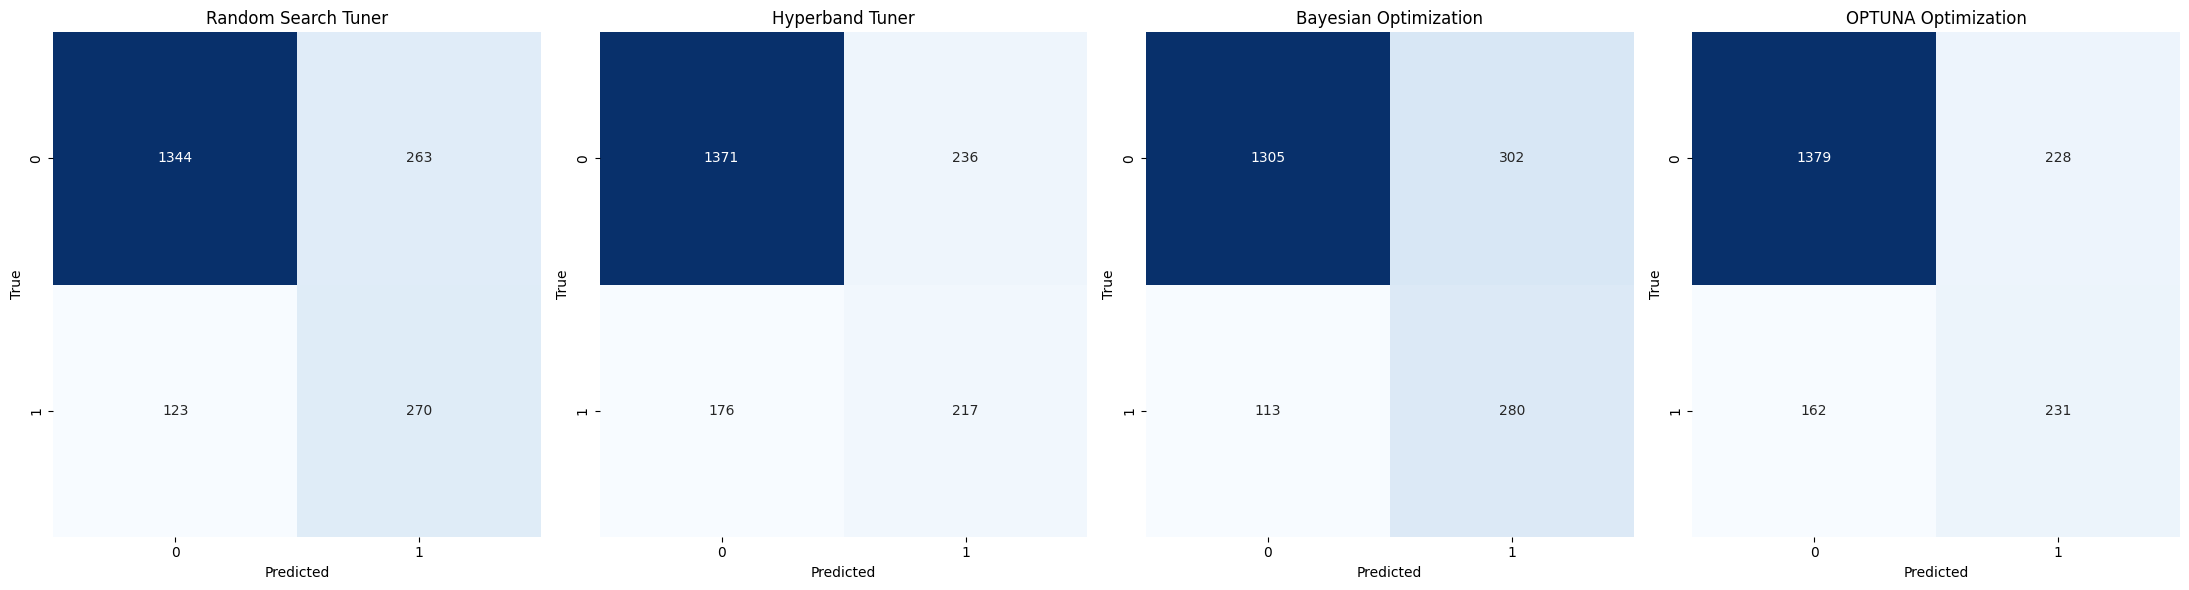

In [49]:
# Round the predictions to binary values (0 or 1)
predictions_rs_rounded = (predictions_rs > 0.5).astype(int)
predictions_hyperband_rounded = (predictions_hyperband > 0.5).astype(int)
predictions_bayesian_rounded = (predictions_bayesian > 0.5).astype(int)
predictions_optuna_rounded = (predictions_optuna > 0.5).astype(int)

# Compute confusion matrices for all models, including the manual model
cm_rs = confusion_matrix(y_test, predictions_rs_rounded)
cm_hyperband = confusion_matrix(y_test, predictions_hyperband_rounded)
cm_bayesian = confusion_matrix(y_test, predictions_bayesian_rounded)
cm_optuna = confusion_matrix(y_test, predictions_optuna_rounded)

# Plot confusion matrices side by side for all models
plt.figure(figsize=(22, 6))  

# Subplot : Random Search Tuner
plt.subplot(1, 4, 1)
sns.heatmap(cm_rs, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Search Tuner")
plt.xlabel("Predicted")
plt.ylabel("True")

# Subplot 2: Hyperband Tuner
plt.subplot(1, 4, 2)
sns.heatmap(cm_hyperband, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Hyperband Tuner")
plt.xlabel("Predicted")
plt.ylabel("True")

# Subplot 3: Bayesian Optimization
plt.subplot(1, 4, 3)
sns.heatmap(cm_bayesian, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Bayesian Optimization")
plt.xlabel("Predicted")
plt.ylabel("True")

# Subplot 4: OPTUNA Optimization
plt.subplot(1, 4, 4)
sns.heatmap(cm_optuna, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("OPTUNA Optimization")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

Based on the confusion matrix, the classification results can be evaluated as follows:

**True Negatives (top left):** How many instances does the model predict as class 0 when they actually belonged to class 0.   
**False Positives (top right):** How many instances does the model predict as class 1 when they actually belonged to class 0.   
**False Negatives (bottom left):** How many instances does the model predict as class 0 when they were actually class 1.  
**True Positives (bottom right):** How many instances does the model predict as class 1 when they actually belonged to class 1.  
  
Optuna:  
The model correctly predicted 1,379 instances as class 0 when they actually belonged to class 0. This is a strong performance in identifying the majority class (0).  
Bayesian Optimization:  
The model incorrectly predicted 302 instances as class 1 when they actually belonged to class 0. These are misclassified instances, indicating that the model sometimes over-predicts class 1.  
Hyperband:  
The model incorrectly predicted 176 instances as class 0 when they were actually class 1. This indicates that the model misses some instances of class 1, failing to correctly identify them.  
Bayesian Optimization:  
The model correctly predicted around 280 instances as class 1 when they actually belonged to class 1. This shows that the model successfully identifies a portion of the minority class.  

### The ROC Curves

The **Receiver Operating Characteristic (ROC) curve** is a graphical representation of the performance of a binary classification model. It illustrates the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR), which is the ratio of negative instances incorrectly classified as positive.

The ROC curve plots the TPR on the y-axis against the FPR on the x-axis for various threshold values used to classify instances as positive or negative. A perfect classifier would have a ROC curve that passes through the top-left corner of the plot, indicating a high TPR and low FPR across all threshold values.

The Area Under the Curve (AUC) metric is often used to quantify the overall performance of the classifier based on the ROC curve. A higher AUC value (closer to 1) indicates better discrimination between positive and negative classes, while an AUC value of 0.5 suggests that the classifier performs no better than random guessing.

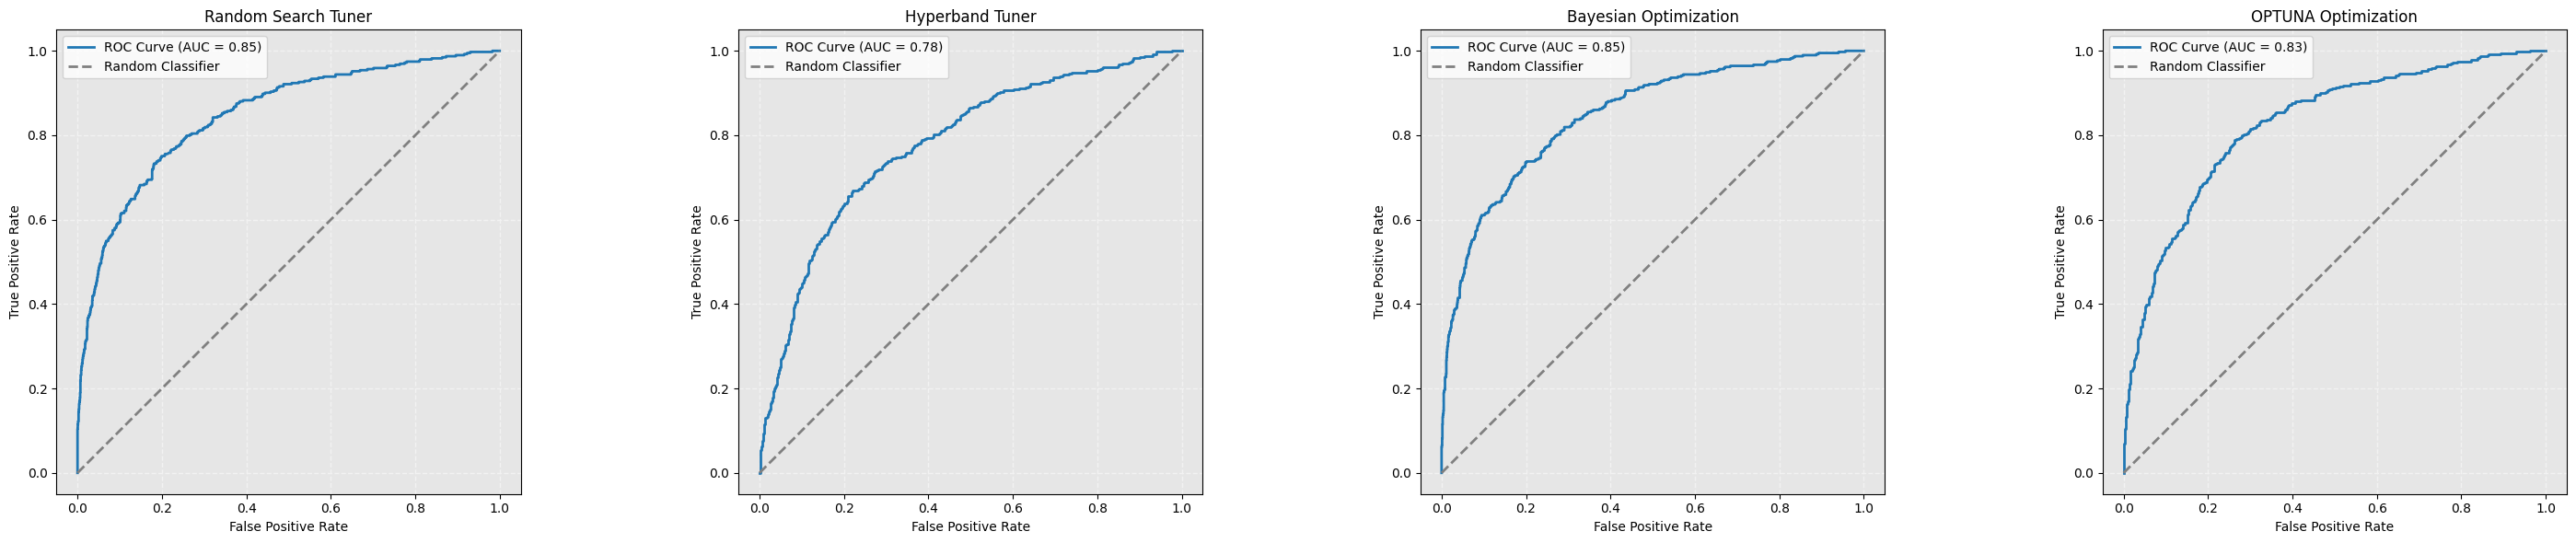

In [50]:
# Compute ROC curve and AUC for all models
fpr_rs, tpr_rs, _ = roc_curve(y_test, predictions_rs)
auc_rs = roc_auc_score(y_test, predictions_rs)

fpr_hyperband, tpr_hyperband, _ = roc_curve(y_test, predictions_hyperband)
auc_hyperband = roc_auc_score(y_test, predictions_hyperband)

fpr_bayesian, tpr_bayesian, _ = roc_curve(y_test, predictions_bayesian)
auc_bayesian = roc_auc_score(y_test, predictions_bayesian)

fpr_optuna, tpr_optuna, _ = roc_curve(y_test, predictions_optuna)
auc_optuna = roc_auc_score(y_test, predictions_optuna)

# Plot ROC curves for all models
plt.figure(figsize=(30, 6)) 

# Subplot 1: Random Search Tuner
plt.subplot(1, 4, 1)
plt.plot(fpr_rs, tpr_rs, label='ROC Curve (AUC = {:.2f})'.format(auc_rs))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Search Tuner')
plt.legend(facecolor='white') 
plt.grid(True, color='0.95', linewidth=1, linestyle="--")
plt.gca().set_aspect('equal')
plt.gca().set_facecolor(".9")

# Subplot 2: Hyperband Tuner
plt.subplot(1, 4, 2)
plt.plot(fpr_hyperband, tpr_hyperband, label='ROC Curve (AUC = {:.2f})'.format(auc_hyperband))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hyperband Tuner')
plt.legend(facecolor='white') 
plt.grid(True, color='0.95', linewidth=1, linestyle="--")
plt.gca().set_aspect('equal')
plt.gca().set_facecolor(".9")

# Subplot 3: Bayesian Optimization
plt.subplot(1, 4, 3)
plt.plot(fpr_bayesian, tpr_bayesian, label='ROC Curve (AUC = {:.2f})'.format(auc_bayesian))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bayesian Optimization')
plt.legend(facecolor='white') 
plt.grid(True, color='0.95', linewidth=1, linestyle="--")
plt.gca().set_aspect('equal')
plt.gca().set_facecolor(".9")

# Subplot 4: OPTUNA Optimization
plt.subplot(1, 4, 4)
plt.plot(fpr_optuna, tpr_optuna, label='ROC Curve (AUC = {:.2f})'.format(auc_optuna))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OPTUNA Optimization')
plt.legend(facecolor='white') 
plt.grid(True, color='0.95', linewidth=1, linestyle="--")
plt.gca().set_aspect('equal')
plt.gca().set_facecolor(".9")

plt.tight_layout()
plt.show()

Random Search:  
An AUC of 0.85 implies that the model can correctly distinguish between the two classes 85% of the time.  
Hyperband:  
An AUC of 0.78 implies that the model can correctly distinguish between the two classes 78% of the time.  
Bayesian Optimization:  
An AUC of 0.85 implies that the model can correctly distinguish between the two classes 85% of the time.  
Optuna:  
An AUC of 0.83 implies that the model can correctly distinguish between the two classes 83% of the time.  

### Overall Best Model
  
Bayesian Optimization and Random Search emerge as the top performers based on AUC (0.85) and their relatively balanced performance in the confusion matrix. Bayesian Optimization also correctly identifies a notable number of class 1 instances (280), which is important for minority class detection.
  
But given that the search process (30 trials and 15 epochs) has likely not fully explored the parameter space, expanding the search could potentially yield better results for all methods:  
Increasing the number of trials could lead to better hyperparameters. Bayesian Optimization, in particular, benefits from more trials, as it refines its model by focusing on promising areas of the parameter space.  
And allowing more training epochs may enable the models to converge more effectively. Random Search and Optuna might particularly benefit, as deeper architectures may need more time to stabilize.
  
At this stage, **Bayesian Optimization** stands out as the best model due to its strong AUC, good handling of class 1 and balanced predictions.